In [1]:
from LightMEF import LightMEF

In [2]:
analysis = LightMEF("Region_US48.xlsx")
data = analysis.load_and_clean_data(start_date='2019-01-01', end_date='2025-12-31')

📂 Loading data...
✅ Data loaded: 61368 observations from 2019-01-01 to 2025-12-31


In [3]:
# 3. Create Time Features
analysis.create_time_variables()

🕐 Creating time variables (Season, Month, Day)...
✅ Time variables created


,Region,UTC time,Local date,Hour,Local time,Time zone,Demand forecast,D,NG,Total interchange,...,hourly_emissions_mlb,hourly_generation_mkwh,hourly_generation_renewables_mkwh,hourly_generation_nonrenewables_mkwh,T,month,year,day,season,trend
30715,US48,2019-01-01 00:00:00,2018-12-31,19,2018-12-31 19:00:00,Eastern,474754,461392.0,443760.0,-1706.0,...,364.694790,442.471,202.493,239.978,1,1,2019,Tuesday,Winter,1
30716,US48,2019-01-01 01:00:00,2018-12-31,20,2018-12-31 20:00:00,Eastern,477012,459577.0,443439.0,-2413.0,...,361.547177,442.123,203.516,238.607,2,1,2019,Tuesday,Winter,2
30717,US48,2019-01-01 02:00:00,2018-12-31,21,2018-12-31 21:00:00,Eastern,472897,451601.0,433541.0,-2375.0,...,346.303369,432.412,203.985,228.427,3,1,2019,Tuesday,Winter,3
30718,US48,2019-01-01 03:00:00,2018-12-31,22,2018-12-31 22:00:00,Eastern,459428,437803.0,419382.0,-816.0,...,327.104588,418.225,203.813,214.412,4,1,2019,Tuesday,Winter,4
30719,US48,2019-01-01 04:00:00,2018-12-31,23,2018-12-31 23:00:00,Eastern,439314,422742.0,406525.0,-1224.0,...,311.432415,405.489,203.129,202.360,5,1,2019,Tuesday,Winter,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92078,US48,2025-12-31 19:00:00,2025-12-31,14,2025-12-31 14:00:00,Eastern,506723,507946.0,505349.0,-3218.0,...,375.250294,504.684,239.645,264.521,61364,12,2025,Wednesday,Winter,61364
92079,US48,2025-12-31 20:00:00,2025-12-31,15,2025-12-31 15:00:00,Eastern,501646,502367.0,499280.0,-2665.0,...,362.819728,499.150,240.544,257.964,61365,12,2025,Wednesday,Winter,61365
92080,US48,2025-12-31 21:00:00,2025-12-31,16,2025-12-31 16:00:00,Eastern,502500,498110.0,494410.0,-3748.0,...,357.368942,494.459,236.810,256.655,61366,12,2025,Wednesday,Winter,61366
92081,US48,2025-12-31 22:00:00,2025-12-31,17,2025-12-31 17:00:00,Eastern,510873,503223.0,498332.0,-4100.0,...,367.588036,497.863,230.274,266.654,61367,12,2025,Wednesday,Winter,61367


In [4]:
# 4. Detrend (Dummy Variable Method)
data = analysis.dummy_variable_seasonality_extraction()


🔧 Extracting seasonality using Dummy Variables...
   -> Fitting OLS for Emissions...
                             OLS Regression Results                             
Dep. Variable:     hourly_emissions_mlb   R-squared:                       0.809
Model:                              OLS   Adj. R-squared:                  0.808
Method:                   Least Squares   F-statistic:                     707.8
Date:                  Thu, 15 Jan 2026   Prob (F-statistic):               0.00
Time:                          17:23:04   Log-Likelihood:            -3.1268e+05
No. Observations:                 61368   AIC:                         6.261e+05
Df Residuals:                     61001   BIC:                         6.294e+05
Df Model:                           366                                         
Covariance Type:              nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
---

In [5]:
# 5. Fit Model & Assign Regimes
ms_results = analysis.fit_msm_full_series()
analysis.assign_regimes_to_data()


🔄 Fitting Markov Switching Model...
[ 9.93702086e-01  1.87442475e-02  5.14933659e-03  1.32949014e-02
 -4.40310808e-03  2.56803228e-04  8.88016715e-01  1.01708964e+00
  1.45882023e-03  9.81554878e-01  9.63898452e-01]
✅ MSM Fitted. High MEF Regime is: 1
                         Markov Switching Model Results                         
Dep. Variable:                        y   No. Observations:                61367
Model:             MarkovAutoregression   Log Likelihood              111455.346
Date:                  Thu, 15 Jan 2026   AIC                        -222888.692
Time:                          17:24:56   BIC                        -222789.421
Sample:                               0   HQIC                       -222857.889
                                - 61367                                         
Covariance Type:                 approx                                         
                             Regime 0 parameters                              
                 coe

,Region,UTC time,Local date,Hour,Local time,Time zone,Demand forecast,D,NG,Total interchange,...,year,day,season,trend,hourly_emissions_detrended,hourly_generation_nonrenewables_detrended,hourly_generation_renewables_detrended,prob_high_regime,regime,regime_label
0,US48,2019-01-01 01:00:00,2018-12-31,20,2018-12-31 20:00:00,Eastern,477012,459577.0,443439.0,-2413.0,...,2019,Tuesday,Winter,2,347.147355,227.874671,204.597170,0.103866,0,Low MEF
1,US48,2019-01-01 02:00:00,2018-12-31,21,2018-12-31 21:00:00,Eastern,472897,451601.0,433541.0,-2375.0,...,2019,Tuesday,Winter,3,335.971801,220.764137,204.068792,0.103866,0,Low MEF
2,US48,2019-01-01 03:00:00,2018-12-31,22,2018-12-31 22:00:00,Eastern,459428,437803.0,419382.0,-816.0,...,2019,Tuesday,Winter,4,327.597865,215.212261,204.933364,0.103866,0,Low MEF
3,US48,2019-01-01 04:00:00,2018-12-31,23,2018-12-31 23:00:00,Eastern,439314,422742.0,406525.0,-1224.0,...,2019,Tuesday,Winter,5,326.718632,214.501763,206.725276,0.103866,0,Low MEF
4,US48,2019-01-01 05:00:00,2018-12-31,24,2019-01-01 00:00:00,Eastern,418641,407689.0,400779.0,-853.0,...,2019,Tuesday,Winter,6,345.381447,225.772243,205.762516,0.103866,0,Low MEF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61362,US48,2025-12-31 19:00:00,2025-12-31,14,2025-12-31 14:00:00,Eastern,506723,507946.0,505349.0,-3218.0,...,2025,Wednesday,Winter,61364,440.902382,280.608030,194.902053,0.023698,0,Low MEF
61363,US48,2025-12-31 20:00:00,2025-12-31,15,2025-12-31 15:00:00,Eastern,501646,502367.0,499280.0,-2665.0,...,2025,Wednesday,Winter,61365,430.925922,275.151099,197.618504,0.031588,0,Low MEF
61364,US48,2025-12-31 21:00:00,2025-12-31,16,2025-12-31 16:00:00,Eastern,502500,498110.0,494410.0,-3748.0,...,2025,Wednesday,Winter,61366,423.610932,271.408454,195.964486,0.032881,0,Low MEF
61365,US48,2025-12-31 22:00:00,2025-12-31,17,2025-12-31 17:00:00,Eastern,510873,503223.0,498332.0,-4100.0,...,2025,Wednesday,Winter,61367,423.270474,272.340799,190.841564,0.033093,0,Low MEF


In [6]:
# import statsmodels.api as sm
# from sklearn.preprocessing import StandardScaler
# import pandas as pd
# y =data['hourly_emissions_detrended']
# x = data['hourly_generation_nonrenewables_detrended']
# # Scale variables
# scaler_y = StandardScaler()
# scaler_x = StandardScaler()
# y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()
# x_scaled = scaler_x.fit_transform(x.values.reshape(-1, 1)).flatten()
# mod = sm.tsa.MarkovAutoregression(
#             endog=y_scaled,
#             exog=x_scaled,
#             k_regimes=2,
#             order=1,
#             trend='c',
#             switching_trend=True,
#             switching_exog=True,
#             switching_variance=False
#         )
# res = mod.fit()
# print(res.summary())
#print(dir(res))
# p=res.params
# print(p[4],p[5])
# h_prob = res.smoothed_marginal_probabilities[:,1] > 0.5
# plt.plot(h_prob)

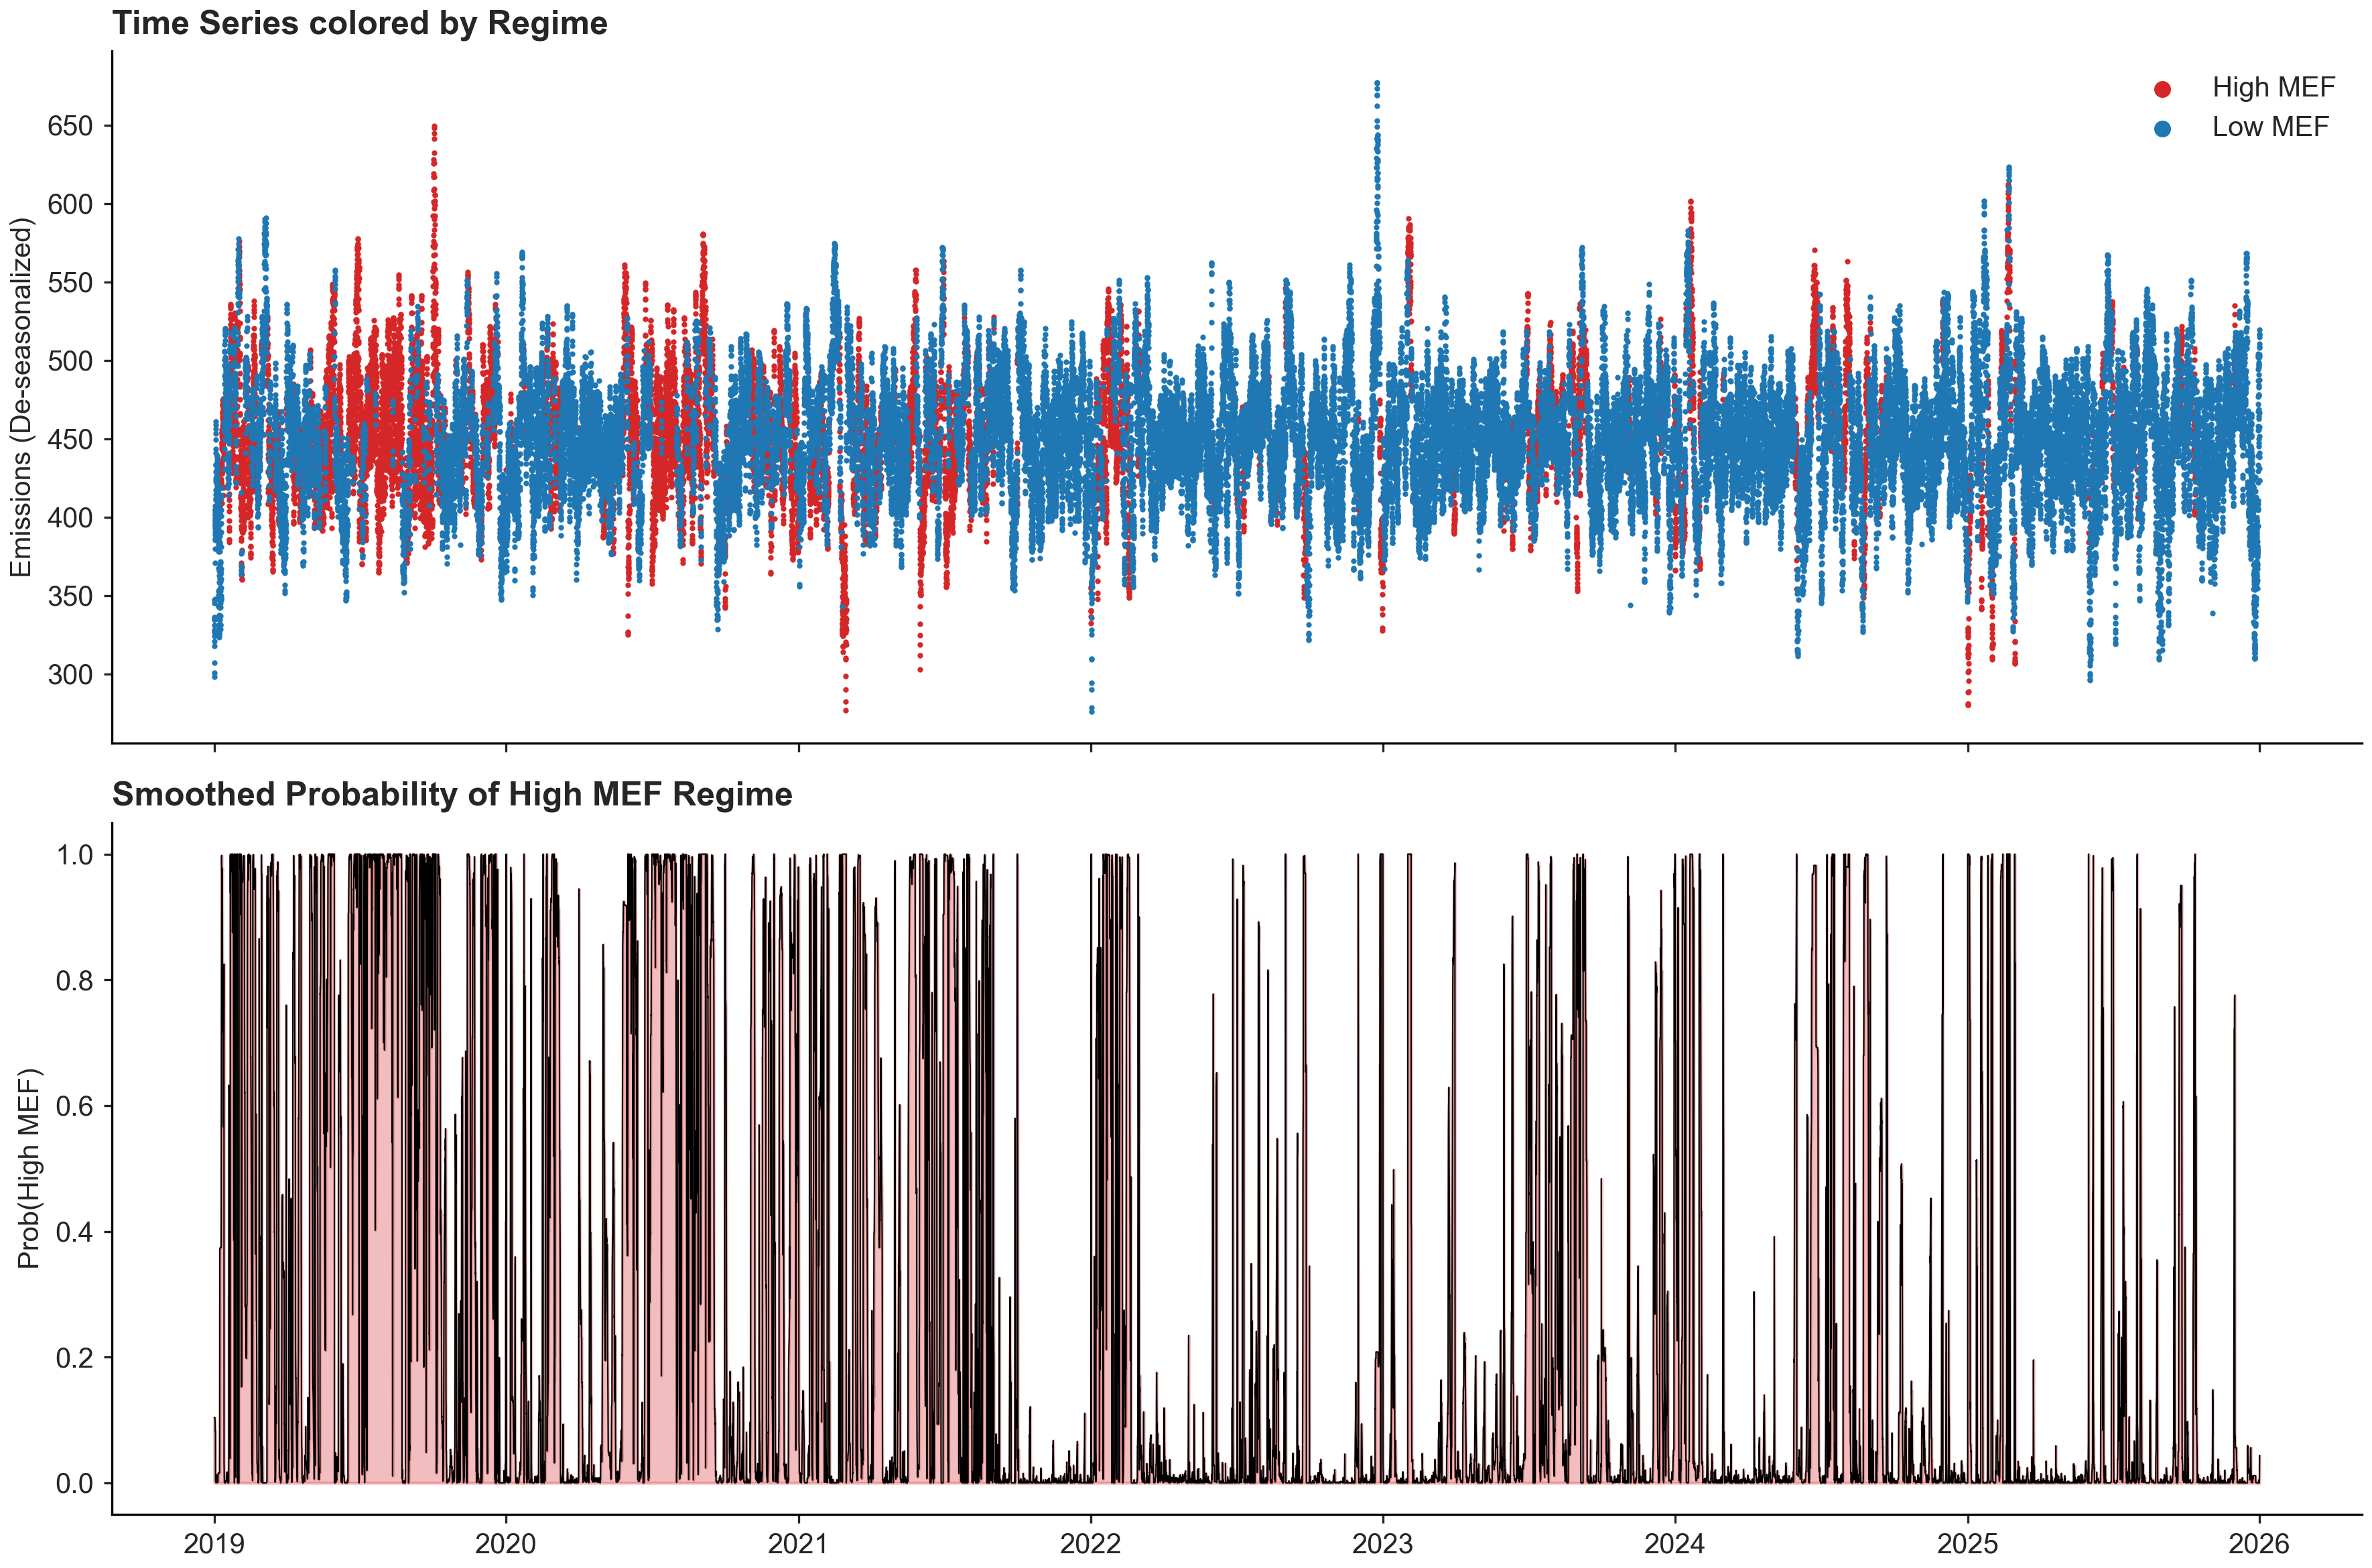

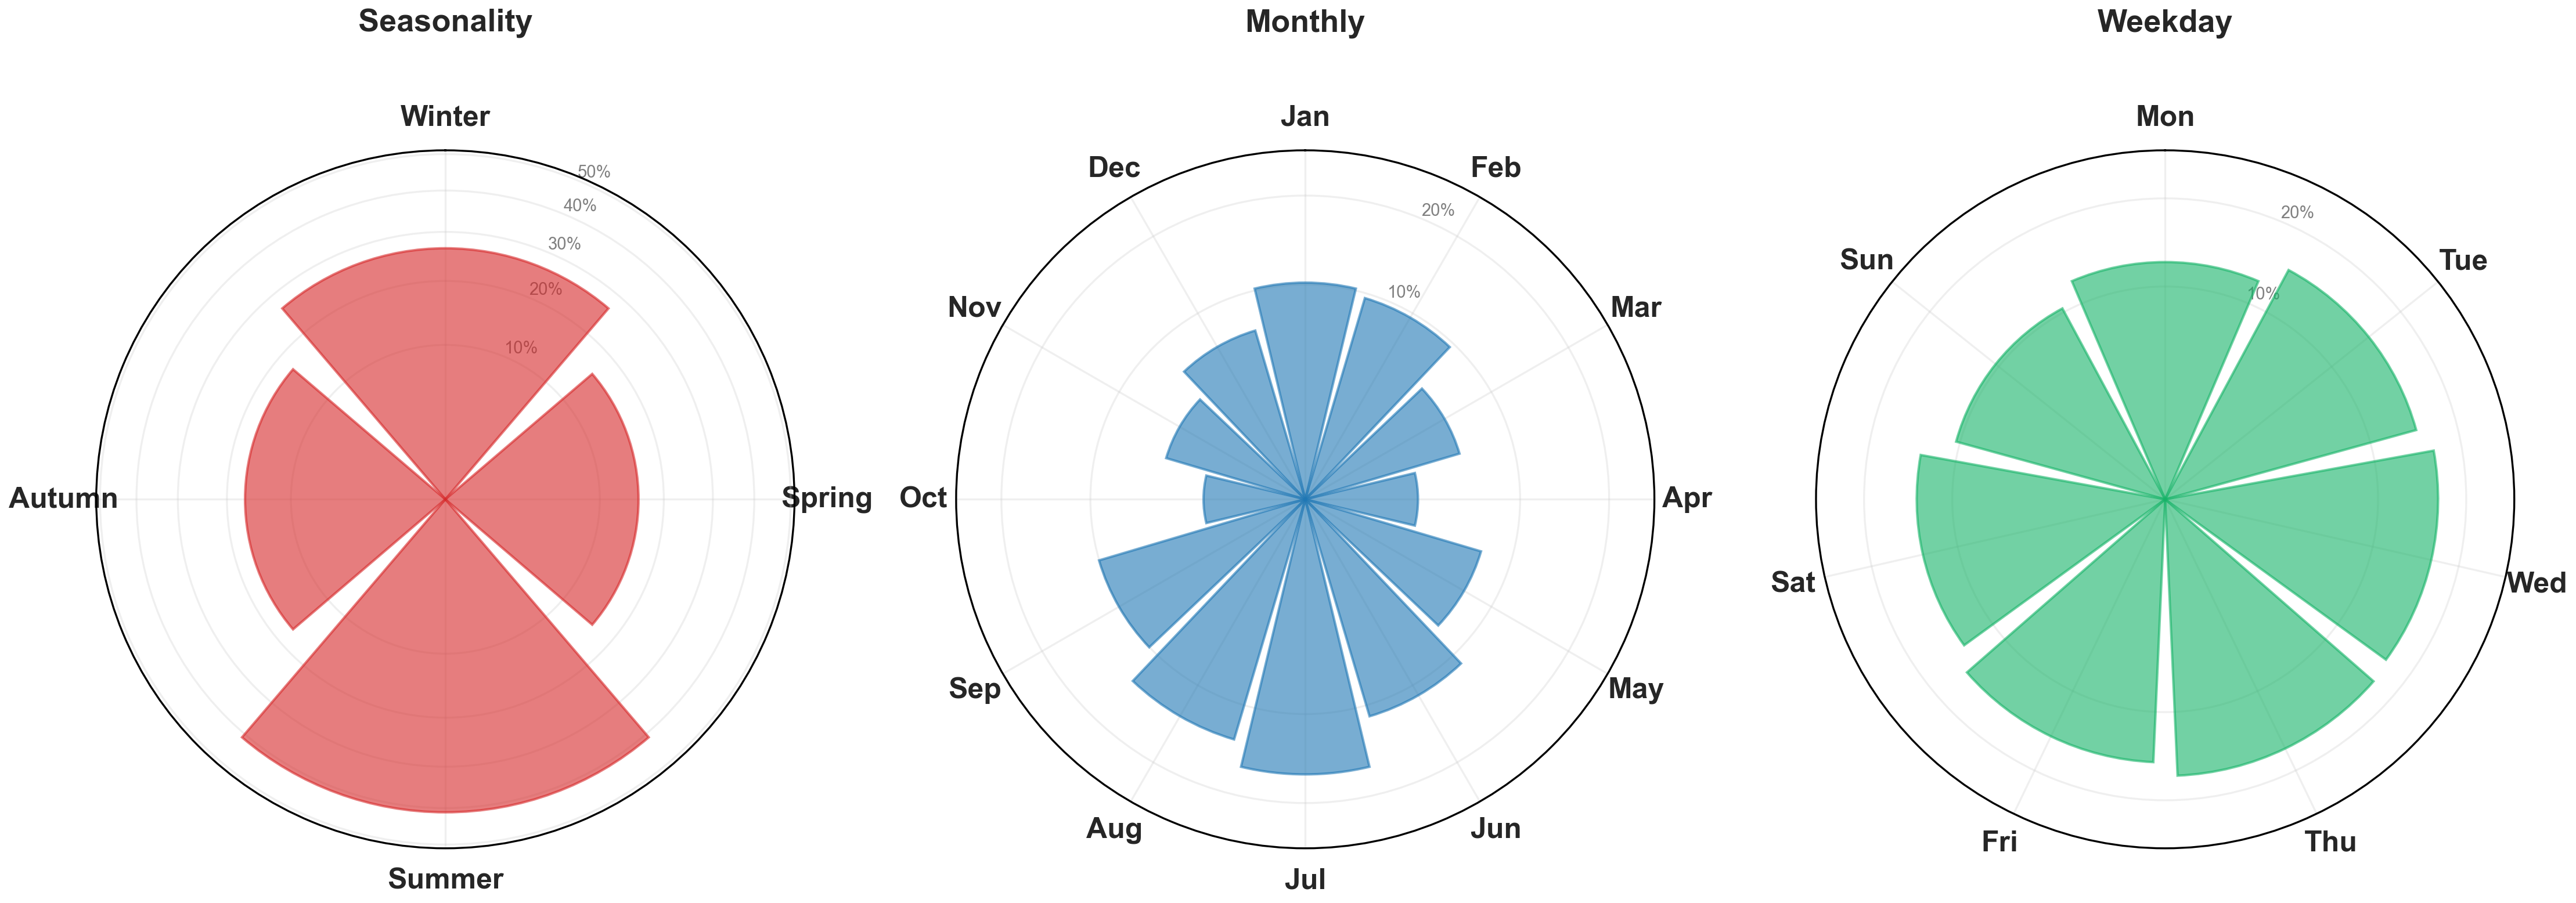

In [7]:
# 6. Plots
#analysis.plot_time_series_comparison()
analysis.plot_regime_time_series()
analysis.plot_regime_polar_charts()

In [8]:
ms_results_hourly = analysis.fit_msm_hourly()


🔄 Fitting Markov Switching Model...


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done  14 out of  48 | elapsed:   18.0s remaining:   43.9s
[Parallel(n_jobs=-1)]: Done  19 out of  48 | elapsed:   20.0s remaining:   30.7s
[Parallel(n_jobs=-1)]: Done  24 out of  48 | elapsed:   21.5s remaining:   21.5s
[Parallel(n_jobs=-1)]: Done  29 out of  48 | elapsed:   22.3s remaining:   14.6s
[Parallel(n_jobs=-1)]: Done  34 out of  48 | elapsed:   23.2s remaining:    9.5s
[Parallel(n_jobs=-1)]: Done  39 out of  48 | elapsed:   24.8s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done  44 out of  48 | elapsed:   26.3s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:   28.0s finished


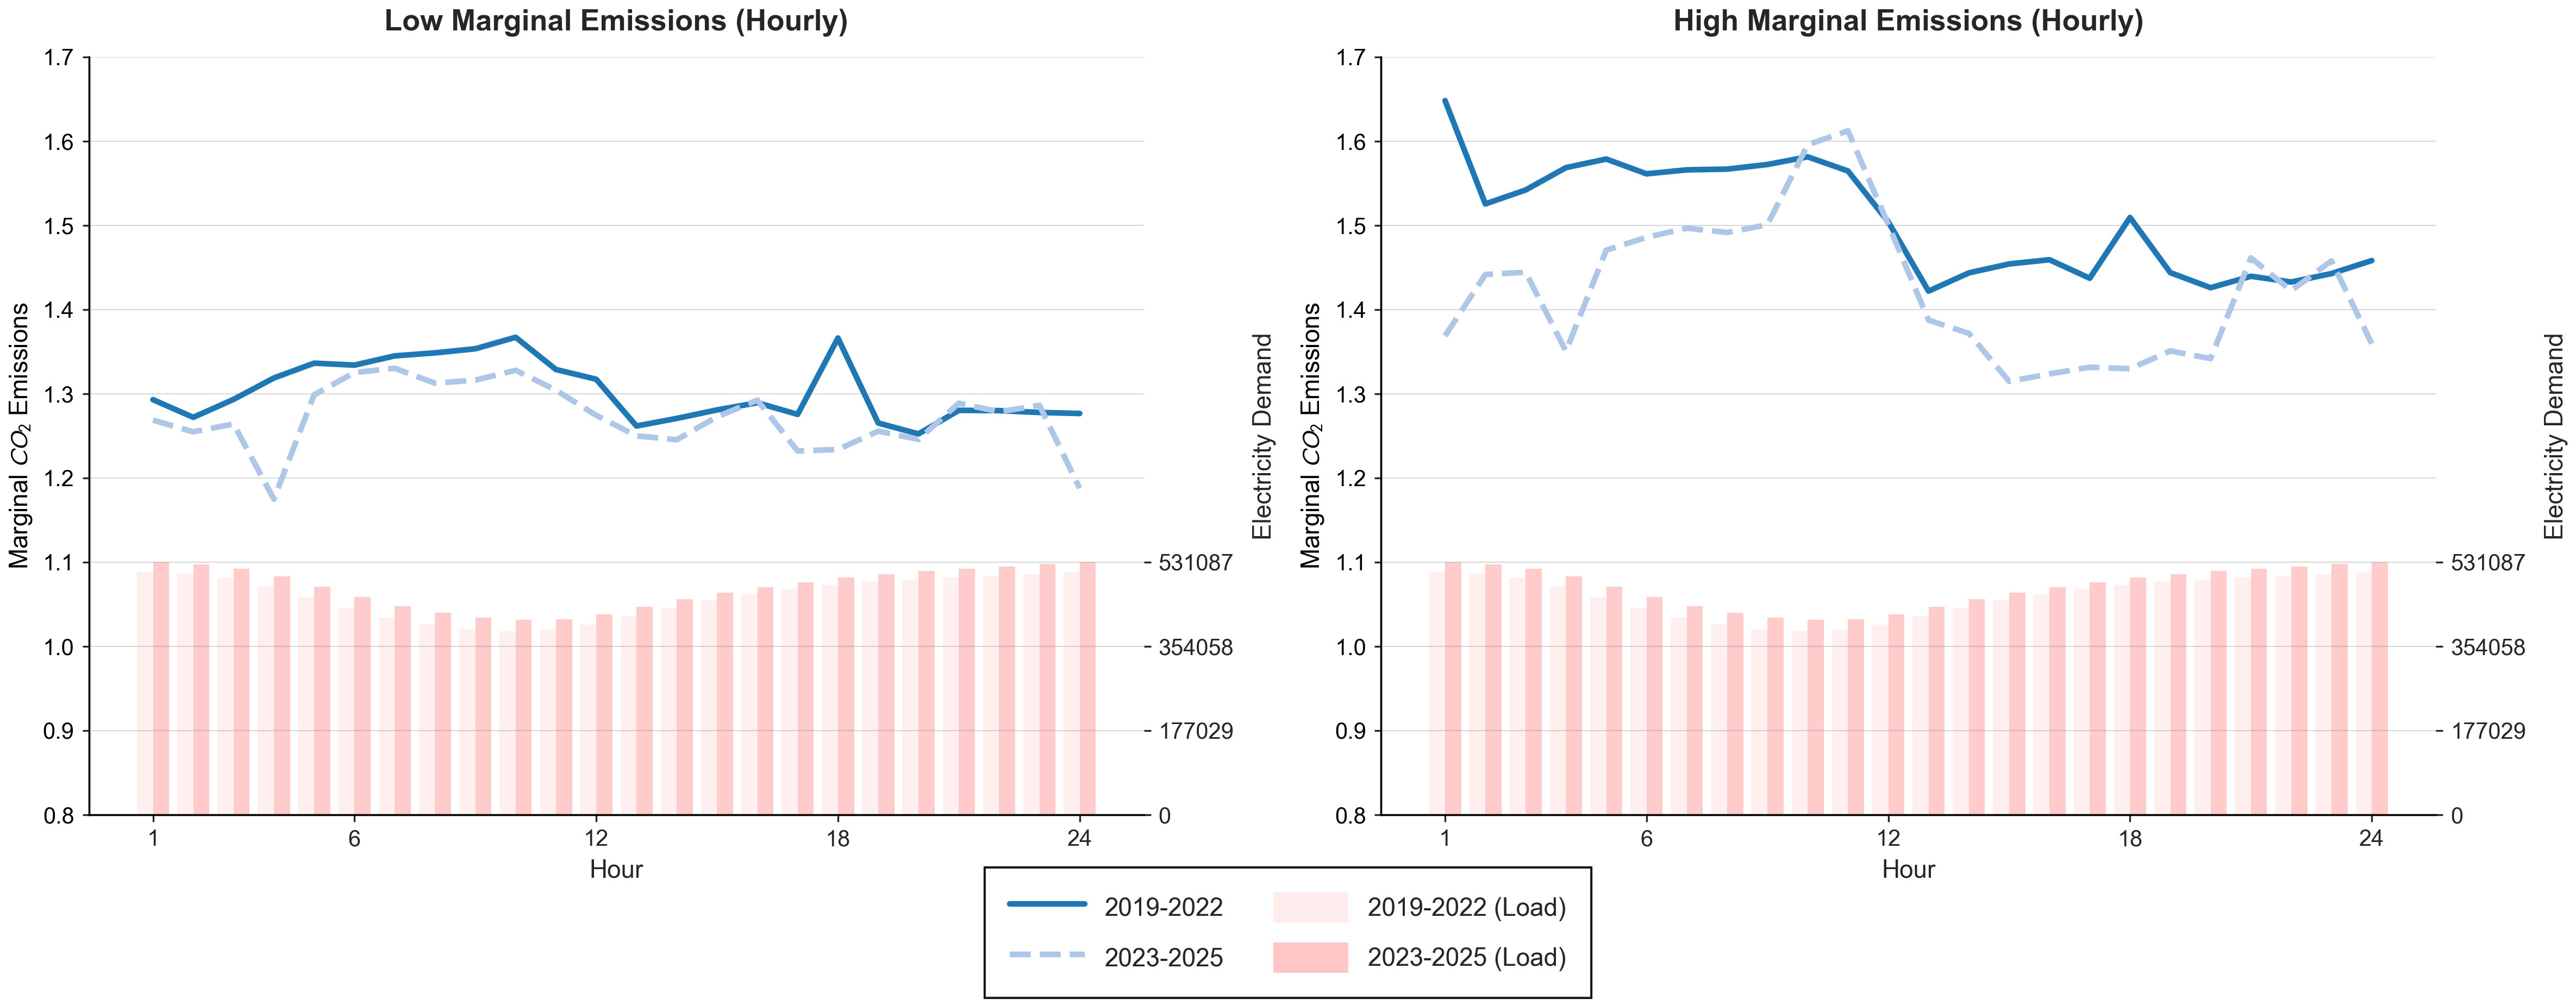

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import io

def plot_mef_analysis_v8(data_input):
    """
    Generates a 2-panel plot with:
    - MEF Y-axis range: 0.85 to 1.65
    - Load histogram visually occupies exactly 1/3 of plot height
    - Load axis ticks only where histogram ends
    - Two separate histograms for each period
    - Single centered legend below both plots with larger size
    """
    
    # 1. Load Data
    if isinstance(data_input, str):
        df = pd.read_csv(io.StringIO(data_input), sep='\s+')
    else:
        df = data_input

    # 2. Prepare Data
    periods = df['period'].unique()
    
    # Calculate hourly load for EACH period separately
    hourly_load_by_period = {}
    for period in periods:
        period_data = df[df['period'] == period]
        hourly_load_by_period[period] = period_data.groupby('hour')['average_load'].mean()
    
    # Get overall max for consistent scaling
    all_loads = pd.concat(hourly_load_by_period.values())
    load_max_value = all_loads.max()

    # 3. Setup Plot with space for legend at bottom
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    plot_configs = [
        {'col': 'beta_low', 'ax': axes[0], 'title': 'Low Marginal Emissions (Hourly)', 'ylabel': 'Marginal $CO_2$ Emissions'},
        {'col': 'beta_high', 'ax': axes[1], 'title': 'High Marginal Emissions (Hourly)', 'ylabel': 'Marginal $CO_2$ Emissions'}
    ]

    # MEF axis constraints
    MEF_MIN = 0.8
    MEF_MAX = 1.7
    MEF_RANGE = MEF_MAX - MEF_MIN
    
    # Bar colors for the two periods
    bar_colors = ['#ffcccc', '#ff9999']  # Light pink and darker pink
    bar_alphas = [0.3, 0.5]
    
    # Store handles and labels for the legend
    all_handles = []
    all_labels = []
    
    for idx, config in enumerate(plot_configs):
        ax = config['ax']
        col_name = config['col']
        
        # --- Primary Axis: MEF Lines ---
        linestyles = ['-', '--']
        colors = ['#1f77b4', '#aec7e8']  # Darker and lighter blue
        
        for i, period in enumerate(periods):
            subset = df[df['period'] == period]
            line, = ax.plot(subset['hour'], subset[col_name], 
                    color=colors[i % len(colors)], 
                    linewidth=2.5, 
                    linestyle=linestyles[i % len(linestyles)],
                    zorder=3)
            
            # Collect handles only from first plot to avoid duplicates
            if idx == 0:
                all_handles.append(line)
                all_labels.append(period)

        # --- MEF Axis limits ---
        ax.set_ylim(MEF_MIN, MEF_MAX)

        # Format Primary Axis
        ax.set_title(config['title'], fontsize=13, pad=12, weight='bold')
        ax.set_xlabel('Hour', fontsize=11)
        ax.set_ylabel(config['ylabel'], fontsize=11, color='black')
        ax.tick_params(axis='y', labelcolor='black', labelsize=10)
        ax.tick_params(axis='x', labelsize=10)
        ax.grid(True, axis='y', alpha=0.3, linestyle='-', linewidth=0.5, color='gray')
        ax.set_xticks([1, 6, 12, 18, 24])
        ax.spines['top'].set_visible(False)
        
        # --- Secondary Axis: Electricity Demand (Histogram) ---
        ax_load = ax.twinx()
        
        # Calculate load axis range so bars occupy 1/3 of visual height
        load_axis_max = load_max_value * 3
        
        # Plot TWO histograms - one for each period
        width = 0.4  # Width of each bar
        hours = range(1, 25)
        
        for i, period in enumerate(periods):
            offset = (i - 0.5) * width  # Offset bars so they're side-by-side
            hourly_load = hourly_load_by_period[period]
            
            bars = ax_load.bar([h + offset for h in hourly_load.index], 
                       hourly_load.values, 
                       color=bar_colors[i], 
                       alpha=bar_alphas[i], 
                       width=width, 
                       zorder=1)
            
            # Collect bar handles only from first plot
            if idx == 0:
                all_handles.append(bars)
                all_labels.append(f'{period} (Load)')
        
        # --- Limit load axis ticks to where histogram ends ---
        ax_load.set_ylim(0, load_axis_max)
        
        # Set tick locations to only show in the bottom 1/3 where data exists
        tick_interval = load_max_value / 3
        load_ticks = [0, tick_interval, tick_interval*2, load_max_value]
        ax_load.set_yticks(load_ticks)
        ax_load.set_yticklabels([f'{int(t)}' for t in load_ticks])
        
        # Format Load Axis
        ax_load.set_ylabel('Electricity Demand', fontsize=11, labelpad=8)
        ax_load.tick_params(axis='y', labelsize=10)
        ax_load.spines['top'].set_visible(False)
        
        # Ensure MEF lines appear on top
        ax.set_zorder(ax_load.get_zorder() + 1)
        ax.patch.set_visible(False)

    # --- Create single centered legend below both plots with LARGER markers ---
        fig.legend(all_handles, all_labels, 
              loc='lower center',
              bbox_to_anchor=(0.5, -0.05),
              ncol=2, 
              frameon=True,
              fontsize=11,
              edgecolor='black',
              fancybox=False,
              markerscale=2.0,  # Makes markers bigger
              handlelength=3.0,  # Makes lines longer
              handleheight=1.5,  # Makes legend entries TALLER
              borderpad=1.0,  # More padding inside legend box
              labelspacing=0.8)  # More vertical space between entries
    
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.15)  # More room for larger legend
    plt.show()


# Call the function
plot_mef_analysis_v8(ms_results_hourly)